(markov_jump_lq)=
```{raw} html
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

```{index} single: python
```

# Markov Jump Linear Quadratic Dynamic Programming

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/share/miniconda3/envs/qe-lectures/lib/python3.8/site-packages (0.4.8)


## Overview

This lecture describes **Markov jump linear quadratic dynamic programming**, an extension of the method described in the [first LQ control lecture](https://python-intro.quantecon.org/lqcontrol.html).

Markov jump linear quadratic dynamic programming is described and analyzed in {cite}`do1999solutions` and the references cited there.

The method has been applied to problems in macroeconomics and monetary economics by {cite}`svensson2008optimal` and {cite}`SvenssonWilliams2009`.

The periodic models of seasonality described in chapter 14 of {cite}`HS2013` are a special case of Markov jump linear quadratic problems.

**Markov jump linear quadratic dynamic programming** combines advantages
of

- the computational simplicity of **linear quadratic dynamic
  programming**, with
- the ability of **finite state Markov chains** to represent
  interesting patterns of random variation.

The idea is to replace the constant matrices that define a **linear quadratic dynamic programming problem**
with $N$ sets of matrices that are fixed functions of
the state of an $N$ state Markov chain.

The state of the Markov chain together with   the continuous $n \times 1$ state vector $x_t$ form the state of the system.

For the class of infinite horizon problems being studied in this lecture, we obtain  $N$ interrelated
matrix Riccati equations that determine $N$ optimal value
functions and $N$ linear decision rules.

One of these value functions and one of these decision rules apply in each of the $N$ Markov states.

That is,  when the Markov state is in state $j$, the value function and the decision rule
for state $j$ prevails.

## Review of useful LQ dynamic programming formulas

To begin, it is handy to have the following reminder in mind.

A **linear quadratic dynamic programming problem** consists of a scalar
discount factor $\beta \in (0,1)$, an $n\times 1$ state
vector $x_t$, an initial condition for $x_0$, a
$k \times 1$ control vector $u_t$, a $p \times 1$
random shock vector $w_{t+1}$ and the following two triples of
matrices:

- A triple of matrices $(R, Q, W)$ defining a loss function

$$
r(x_t, u_t) = x_t' R x_t + u_t' Q u_t + 2 u_t' W x_t
$$

- a triple of matrices $(A, B, C)$ defining a state-transition
  law

$$
x_{t+1} = A x_t + B u_t + C w_{t+1}
$$

The problem is

$$
-x_0' P x_0 - \rho = \min_{\{u_t\}_{t=0}^\infty} E \sum_{t=0}^{\infty} \beta^t r(x_t, u_t)
$$

subject to the transition law for the state.

The optimal decision rule  has the form

$$
u_t = - F x_t
$$

and the optimal value function is of the form

$$
-\left( x_t' P x_t  + \rho \right)
$$

where $P$ solves the algebraic matrix Riccati equation

$$
P = R+ \beta A' P A
          -(\beta B'  P A + W)' (Q + \beta B P B )^{-1} (\beta B P A + W)
$$

and the constant $\rho$ satisfies

$$
\rho = \beta
  \left( \rho + {\rm trace}(P C C') \right)
$$

and the matrix $F$ in the decision rule for $u_t$ satisfies

$$
F = (Q + \beta  B' P B)^{-1} (\beta (B' P A )+ W)
$$

With the preceding formulas in mind, we are ready to approach Markov Jump linear quadratic dynamic programming.

## Linked Ricatti equations for Markov LQ dynamic programming

The key idea is to make the matrices $A, B, C, R, Q, W$ fixed
functions of a finite state $s$ that is governed by an $N$
state Markov chain.

This makes decision rules depend on the Markov
state, and so fluctuate through time in limited ways.

In particular, we use the following extension of a discrete-time linear
quadratic dynamic programming problem.

We let $s_t \in [1, 2, \ldots, N]$ be a time $t$ realization of an
$N$-state Markov chain with transition matrix $\Pi$ having
typical element $\Pi_{ij}$.

Here $i$ denotes today and
$j$ denotes tomorrow and

$$
\Pi_{ij} = {\rm Prob}(s_{t+1} = j |s_t = i)
$$

We’ll switch between labeling today’s state as $s_t$ and
$i$ and between labeling tomorrow’s state as $s_{t+1}$ or
$j$.

The decision-maker solves the minimization problem:

$$
\min_{\{u_t\}_{t=0}^\infty} E \sum_{t=0}^{\infty} \beta^t r(x_t, s_t, u_t)
$$

with

$$
r(x_t, s_t, u_t) = -( x_t' R_{s_t} x_t + u_t' Q_{s_t} u_t + 2 u_t' W_{s_t} x_t)
$$

subject to linear laws of motion with matrices $(A,B,C)$ each
possibly dependent on the Markov-state-$s_t$:

$$
x_{t+1} = A_{s_t} x_t + B_{s_t} u_t + C_{s_t} w_{t+1}
$$

where $\{w_{t+1}\}$ is an i.i.d. stochastic process with
$w_{t+1} \sim {\cal N}(0,I)$.

The optimal decision rule for this problem has the form

$$
u_t = - F_{s_t} x_t
$$

and the optimal value functions are of the form

$$
-\left( x_t' P_{s_t} x_t  + \rho_{s_t} \right)
$$

or equivalently

$$
-x_t' P_i x_t - \rho_i
$$

The optimal value functions $- x' P_i x - \rho_i$ for
$i = 1, \ldots, n$ satisfy the $N$
interrelated Bellman equations

$$
\begin{split}
-x' P_i x - \rho_i & = \max_u -
  \\
  &
   \left[
     x'R_i x + u' Q_i u + 2 u' W_i x -
             \beta \sum_j \Pi_{ij}E ((A_i x + B_i u + C_i w)' P_j
             (A_i x + B_i u + C_i w) x + \rho_j)
   \right]
\end{split}
$$

The matrices $P_{s_t} = P_i$ and the scalars
$\rho_{s_t} = \rho_i, i = 1, \ldots$, n satisfy the following stacked system of
**algebraic matrix Riccati** equations:

$$
P_i = R_i + \beta \sum_j A_i' P_j A_i
 \Pi_{ij}
          -\sum_j \Pi_{ij}[ (\beta B_i'  P_j A_i + W_i)' (Q + \beta B_i' P_j B_i)^{-1}
          (\beta B_i' P_j A_i + W_i)]
$$

$$
\rho_i = \beta
 \sum_j \Pi_{ij} ( \rho_j + {\rm trace}(P_j C_i C_i') )
$$

and the $F_i$ in the optimal decision rules are

$$
F_i = (Q_i + \beta \sum_j \Pi_{ij} B_i' P_j B_i)^{-1}
(\beta \sum_j \Pi_{ij}(B_i' P_j A_i )+ W_i)
$$

## Applications

We now describe some Python code and a few examples that put the code to work.

To begin, we import these Python modules

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
# Set discount factor
β = 0.95

## Example 1

This example is a version of a classic problem of optimally adjusting a variable $k_t$ to a target level in the face of costly adjustment.

This provides a model of gradual adjustment.

Given $k_{0}$, the objective function is

$$
\max_{\left\{ k_{t}\right\} _{t=1}^{\infty}}E_{0}\sum_{t=0}^{\infty}\beta^{t}r\left(s_{t},k_{t}\right)
$$

where the one-period payoff function is

$$
r(s_{t},k_{t})=f_{1,s_t} k_{t}-f_{2,s_t} k_{t}^{2}-d_{s_t}(k_{t+1}-k_{t})^{2},
$$

$E_0$ is a mathematical expectation conditioned on time $0$ information $x_0, s_0$
and the transition law for continuous state variable $k_t$ is

$$
k_{t+1}-k_{t}=u_{t}
$$

We can think of $k_t$ as the decision-maker’s capital and
$u_t$ as costs of adjusting the level of capital.

We assume that $f_{1}\left(s_{t}\right)>0$,
$f_{2}\left(s_{t}\right)>0$, and $d\left(s_{t}\right)>0$.

Denote the state transition matrix for Markov state
$s_{t}\in\left\{1,2 \right\}$ as $\Pi$:

$$
\Pr \left(s_{t+1}=j \mid s_{t}= i \right)=\Pi_{ij}
$$

Let $x_{t}=\begin{bmatrix} k_{t}\\ 1 \end{bmatrix}$

We can represent the one-period payoff function
$r\left(s_{t},k_{t}\right)$ and the state-transition law as

$$
\begin{aligned}
r\left(s_{t},k_{t}\right)   =f_{1,s_t} k_{t}-f_{2,s_t} k_{t}^{2}-d_{s_t} u_{t}{}^{2} \\
    =-x_{t}^{\prime}\underset{\equiv R(s_{t})}{\underbrace{\begin{bmatrix}
f_{2,s_t} & -\frac{f_{1,s_t}}{2}\\
-\frac{f_{1,s_t}}{2} & 0
\end{bmatrix}}}x_{t}+\underset{\equiv Q\left(s_{t}\right)}{\underbrace{d_{s_t}}}u_{t}{}^{2}
 \end{aligned}
$$

$$
x_{t+1}=\begin{bmatrix}
k_{t+1}\\
1
\end{bmatrix}=\underset{\equiv A\left(s_{t}\right)}{\underbrace{I_{2}}}x_{t}+\underset{\equiv B\left(s_{t}\right)}{\underbrace{\begin{bmatrix}
1\\
0
\end{bmatrix}}}u_{t}
$$

In [4]:
def construct_arrays1(f1_vals=[1. ,1.],
                      f2_vals=[1., 1.],
                      d_vals=[1., 1.]):
    """
    Construct matrices that map the problem described in example 1
    into a Markov jump linear quadratic dynamic programming problem
    """

    # Number of Markov states
    m = len(f1_vals)
    # Number of state and control variables
    n, k = 2, 1

    # Construct sets of matrices for each state
    As = [np.eye(n) for i in range(m)]
    Bs = [np.array([[1, 0]]).T for i in range(m)]

    Rs = np.zeros((m, n, n))
    Qs = np.zeros((m, k, k))

    for i in range(m):
        Rs[i, 0, 0] = f2_vals[i]
        Rs[i, 1, 0] = - f1_vals[i] / 2
        Rs[i, 0, 1] = - f1_vals[i] / 2

        Qs[i, 0, 0] = d_vals[i]

    Cs, Ns = None, None

    # Compute the optimal k level of the payoff function in each state
    k_star = np.empty(m)
    for i in range(m):
        k_star[i] = f1_vals[i] / (2 * f2_vals[i])

    return Qs, Rs, Ns, As, Bs, Cs, k_star

The continuous part of the state $x_t$ consists of two variables,
namely, $k_t$ and a constant term.

In [5]:
state_vec1 = ["k", "constant term"]

We start with a Markov transition matrix that makes the Markov state be
strictly periodic:

$$
\Pi_{1}=\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix},
$$

We set $f_{1,{s_t}}$ and $f_{2,{s_t}}$ to be independent of the
Markov state $s_t$

$$
f_{1,1}=f_{1,2} = 1,
$$

$$
f_{2,1} =f_{2,2} = 1
$$

In contrast to $f_{1,{s_t}}$ and $f_{2,{s_t}}$, we make the
adjustment cost $d_{s_t}$ vary across Markov states $s_t$.

We set the adjustment cost to be lower in Markov state $2$

$$
d_1=1, d_2 = 0.5
$$

The following code forms a Markov switching LQ problem and computes the
optimal value functions and optimal decision rules for each Markov state

In [6]:
# Construct Markov transition matrix
Π1 = np.array([[0., 1.],
               [1., 0.]])

In [7]:
# Construct matrices
Qs, Rs, Ns, As, Bs, Cs, k_star = construct_arrays1(d_vals=[1., 0.5])

In [8]:
# Construct a Markov Jump LQ problem
ex1_a = qe.LQMarkov(Π1, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
# Solve for optimal value functions and decision rules
ex1_a.stationary_values();

Let’s look at the value function matrices and the decision rules for
each Markov state

In [9]:
# P(s)
ex1_a.Ps

array([[[ 1.56626026, -0.78313013],
        [-0.78313013, -4.60843493]],

       [[ 1.37424214, -0.68712107],
        [-0.68712107, -4.65643947]]])

In [10]:
# d(s) = 0, since there is no randomness
ex1_a.ds

array([0., 0.])

In [11]:
# F(s)
ex1_a.Fs

array([[[ 0.56626026, -0.28313013]],

       [[ 0.74848427, -0.37424214]]])

Now we’ll plot the decision rules and see if they make sense

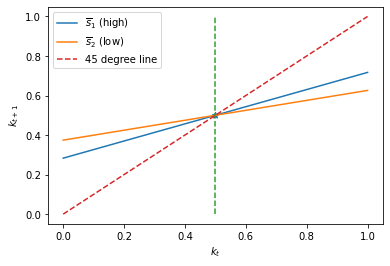

In [12]:
# Plot the optimal decision rules
k_grid = np.linspace(0., 1., 100)
# Optimal choice in state s1
u1_star = - ex1_a.Fs[0, 0, 1] - ex1_a.Fs[0, 0, 0] * k_grid
# Optimal choice in state s2
u2_star = - ex1_a.Fs[1, 0, 1] - ex1_a.Fs[1, 0, 0] * k_grid

fig, ax = plt.subplots()
ax.plot(k_grid, k_grid + u1_star, label="$\overline{s}_1$ (high)")
ax.plot(k_grid, k_grid + u2_star, label="$\overline{s}_2$ (low)")

# The optimal k*
ax.scatter([0.5, 0.5], [0.5, 0.5], marker="*")
ax.plot([k_star[0], k_star[0]], [0., 1.0], '--')

# 45 degree line
ax.plot([0., 1.], [0., 1.], '--', label="45 degree line")

ax.set_xlabel("$k_t$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

The above graph plots $k_{t+1}= k_t + u_t = k_t - F x_t$ as an affine
(i.e., linear in $k_t$ plus a constant) function of $k_t$
for both Markov states $s_t$.

It also plots the 45 degree line.

Notice that the two $s_t$-dependent *closed loop* functions that
determine $k_{t+1}$ as functions of $k_t$ share the same
rest point (also called a fixed point) at $k_t = 0.5$.

Evidently, the optimal decision rule in Markov state $2$,
in which the adjustment cost is lower, makes $k_{t+1}$ a flatter
function of $k_t$ in Markov state $2$.

This happens because when $k_t$ is not at its fixed point,
$| u_{t,2}| > | u_{t,2} |$, so
that the decision-maker adjusts toward the fixed point faster when
the Markov state $s_t$ takes a value that makes it cheaper.

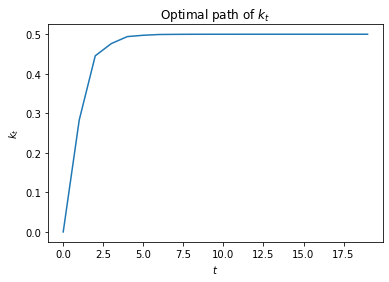

In [13]:
# Compute time series
T = 20
x0 = np.array([[0., 1.]]).T
x_path = ex1_a.compute_sequence(x0, ts_length=T)[0]

fig, ax = plt.subplots()
ax.plot(range(T), x_path[0, :-1])
ax.set_xlabel("$t$")
ax.set_ylabel("$k_t$")
ax.set_title("Optimal path of $k_t$")
plt.show()

Now we’ll depart from the preceding transition matrix that made the
Markov state be strictly periodic.

We’ll begin with symmetric transition matrices of the form

$$
\Pi_{2}=\begin{bmatrix}
1-\lambda & \lambda\\
\lambda & 1-\lambda
\end{bmatrix}.
$$

In [14]:
λ = 0.8 # high λ
Π2 = np.array([[1-λ, λ],
               [λ, 1-λ]])

ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.57291724, -0.28645862]],

       [[ 0.74434525, -0.37217263]]])

In [15]:
λ = 0.2 # low λ
Π2 = np.array([[1-λ, λ],
               [λ, 1-λ]])

ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.59533259, -0.2976663 ]],

       [[ 0.72818728, -0.36409364]]])

We can plot optimal decision rules associated with different
$\lambda$ values.

In [16]:
λ_vals = np.linspace(0., 1., 10)
F1 = np.empty((λ_vals.size, 2))
F2 = np.empty((λ_vals.size, 2))

for i, λ in enumerate(λ_vals):
    Π2 = np.array([[1-λ, λ],
                   [λ, 1-λ]])

    ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
    ex1_b.stationary_values();
    F1[i, :] = ex1_b.Fs[0, 0, :]
    F2[i, :] = ex1_b.Fs[1, 0, :]

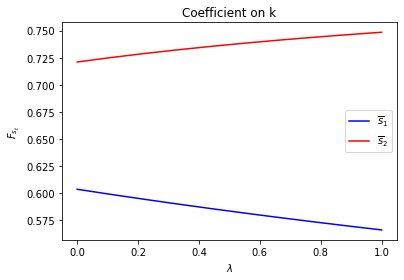

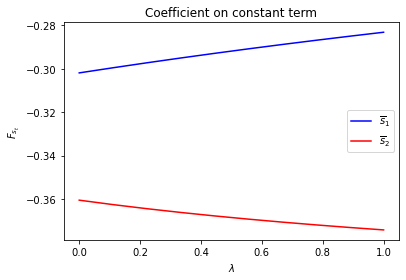

In [17]:
for i, state_var in enumerate(state_vec1):
    fig, ax = plt.subplots()
    ax.plot(λ_vals, F1[:, i], label="$\overline{s}_1$", color="b")
    ax.plot(λ_vals, F2[:, i], label="$\overline{s}_2$", color="r")

    ax.set_xlabel("$\lambda$")
    ax.set_ylabel("$F_{s_t}$")
    ax.set_title(f"Coefficient on {state_var}")
    ax.legend()
    plt.show()

Notice how the decision rules’ constants and slopes behave as functions
of $\lambda$.

Evidently, as the Markov chain becomes *more nearly periodic* (i.e., as
$\lambda \rightarrow 1$), the dynamic program adjusts capital
faster in the low adjustment cost Markov state to take advantage of what
is only temporarily a more favorable time to invest.

Now let’s study situations in which the Markov transition matrix
$\Pi$ is asymmetric

$$
\Pi_{3}=\begin{bmatrix}
1-\lambda & \lambda\\
\delta & 1-\delta
\end{bmatrix}.
$$

In [18]:
λ, δ = 0.8, 0.2
Π3 = np.array([[1-λ, λ],
               [δ, 1-δ]])

ex1_b = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.57169781, -0.2858489 ]],

       [[ 0.72749075, -0.36374537]]])

We can plot optimal decision rules for different $\lambda$ and
$\delta$ values.

In [19]:
λ_vals = np.linspace(0., 1., 10)
δ_vals = np.linspace(0., 1., 10)

λ_grid = np.empty((λ_vals.size, δ_vals.size))
δ_grid = np.empty((λ_vals.size, δ_vals.size))
F1_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec1)))
F2_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec1)))

for i, λ in enumerate(λ_vals):
    λ_grid[i, :] = λ
    δ_grid[i, :] = δ_vals
    for j, δ in enumerate(δ_vals):
        Π3 = np.array([[1-λ, λ],
                       [δ, 1-δ]])

        ex1_b = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
        ex1_b.stationary_values();
        F1_grid[i, j, :] = ex1_b.Fs[0, 0, :]
        F2_grid[i, j, :] = ex1_b.Fs[1, 0, :]

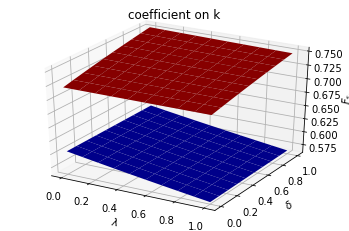

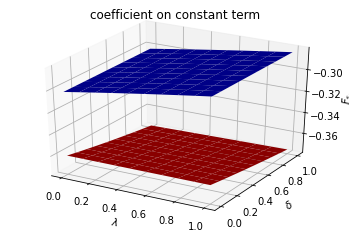

In [20]:
for i, state_var in enumerate(state_vec1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # high adjustment cost, blue surface
    ax.plot_surface(λ_grid, δ_grid, F1_grid[:, :, i], color="b")
    # low adjustment cost, red surface
    ax.plot_surface(λ_grid, δ_grid, F2_grid[:, :, i], color="r")
    ax.set_xlabel("$\lambda$")
    ax.set_ylabel("$\delta$")
    ax.set_zlabel("$F_{s_t}$")
    ax.set_title(f"coefficient on {state_var}")
    plt.show()

The following code defines a wrapper function that computes optimal
decision rules for cases with different Markov transition matrices

In [21]:
def run(construct_func, vals_dict, state_vec):
    """
    A Wrapper function that repeats the computation above
    for different cases
    """

    Qs, Rs, Ns, As, Bs, Cs, k_star = construct_func(**vals_dict)

    # Symmetric Π
    # Notice that pure periodic transition is a special case
    # when λ=1
    print("symmetric Π case:\n")
    λ_vals = np.linspace(0., 1., 10)
    F1 = np.empty((λ_vals.size, len(state_vec)))
    F2 = np.empty((λ_vals.size, len(state_vec)))

    for i, λ in enumerate(λ_vals):
        Π2 = np.array([[1-λ, λ],
                       [λ, 1-λ]])

        mplq = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
        mplq.stationary_values();
        F1[i, :] = mplq.Fs[0, 0, :]
        F2[i, :] = mplq.Fs[1, 0, :]

    for i, state_var in enumerate(state_vec):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(λ_vals, F1[:, i], label="$\overline{s}_1$", color="b")
        ax.plot(λ_vals, F2[:, i], label="$\overline{s}_2$", color="r")

        ax.set_xlabel("$\lambda$")
        ax.set_ylabel("$F(\overline{s}_t)$")
        ax.set_title(f"coefficient on {state_var}")
        ax.legend()
        plt.show()

    # Plot optimal k*_{s_t} and k that optimal policies are targeting
    # only for example 1
    if state_vec == ["k", "constant term"]:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for i in range(2):
            F = [F1, F2][i]
            c = ["b", "r"][i]
            ax.plot([0, 1], [k_star[i], k_star[i]], "--",
                    color=c, label="$k^*(\overline{s}_"+str(i+1)+")$")
            ax.plot(λ_vals, - F[:, 1] / F[:, 0], color=c,
                    label="$k^{target}(\overline{s}_"+str(i+1)+")$")

        # Plot a vertical line at λ=0.5
        ax.plot([0.5, 0.5], [min(k_star), max(k_star)], "-.")

        ax.set_xlabel("$\lambda$")
        ax.set_ylabel("$k$")
        ax.set_title("Optimal k levels and k targets")
        ax.text(0.5, min(k_star)+(max(k_star)-min(k_star))/20, "$\lambda=0.5$")
        ax.legend(bbox_to_anchor=(1., 1.))
        plt.show()

    # Asymmetric Π
    print("asymmetric Π case:\n")
    δ_vals = np.linspace(0., 1., 10)

    λ_grid = np.empty((λ_vals.size, δ_vals.size))
    δ_grid = np.empty((λ_vals.size, δ_vals.size))
    F1_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec)))
    F2_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec)))

    for i, λ in enumerate(λ_vals):
        λ_grid[i, :] = λ
        δ_grid[i, :] = δ_vals
        for j, δ in enumerate(δ_vals):
            Π3 = np.array([[1-λ, λ],
                           [δ, 1-δ]])

            mplq = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
            mplq.stationary_values();
            F1_grid[i, j, :] = mplq.Fs[0, 0, :]
            F2_grid[i, j, :] = mplq.Fs[1, 0, :]

    for i, state_var in enumerate(state_vec):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(λ_grid, δ_grid, F1_grid[:, :, i], color="b")
        ax.plot_surface(λ_grid, δ_grid, F2_grid[:, :, i], color="r")
        ax.set_xlabel("$\lambda$")
        ax.set_ylabel("$\delta$")
        ax.set_zlabel("$F(\overline{s}_t)$")
        ax.set_title(f"coefficient on {state_var}")
        plt.show()

To illustrate the code with another example, we shall set
$f_{2,s_t}$ and $d_{s_t}$ as constant functions and

$$
f_{1,1} = 0.5, f_{1,2} = 1
$$

Thus, the sole role of the Markov jump state $s_t$ is to identify
times in which capital is very productive and other times in which it is
less productive.

The example below reveals much about the structure of the optimum
problem and optimal policies.

Only $f_{1,{s_t}}$ varies with $s_t$.

So there are different $s_t$-dependent optimal static $k$
level in different states $k^*_{s_t}=\frac{f_{1,{s_t}}}{2 f_{2,{s_t}}}$,
values of $k$ that maximize one-period payoff functions in each
state.

We denote a target $k$ level as $k^{target}_{s_t}$, the fixed
point of the optimal policies in each state, given the value of
$\lambda$.

We call $k^{target}_{s_t}$ a “target” because in each Markov state
$s_t$, optimal policies are contraction mappings and will push
$k_t$ towards a fixed point $k^{target}_{s_t}$.

When $\lambda \rightarrow 0$, each Markov state becomes close to
absorbing state and consequently
$k^{target}_{s_t} \rightarrow k^*_{s_t}$.

But when $\lambda \rightarrow 1$, the Markov transition matrix
becomes more nearly periodic, so the optimum decision rules target more
at the optimal k level in the other state in order to enjoy higher
expected payoff in the next period.

The switch happens at $\lambda = 0.5$ when both states are equally
likely to be reached.

Below we plot an additional figure that shows optimal $k$ levels
in the two states Markov jump state and also how the targeted $k$
levels change as $\lambda$ changes.

symmetric Π case:



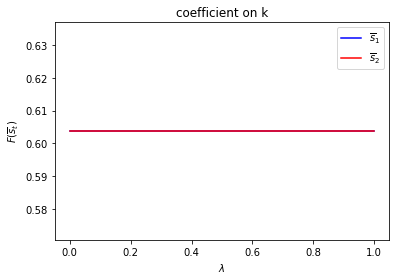

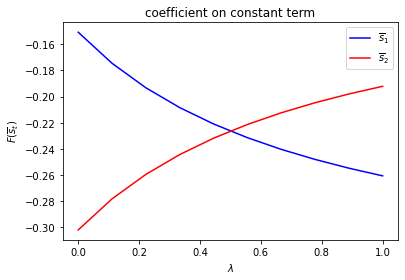

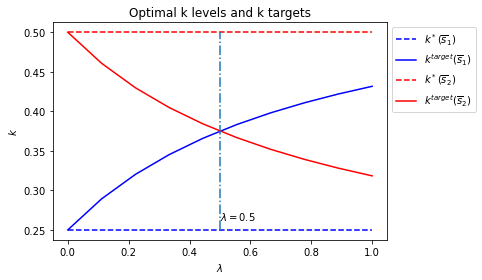

asymmetric Π case:



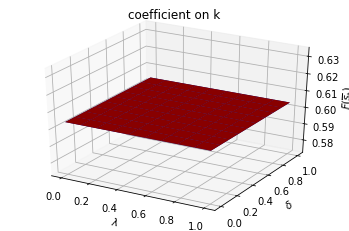

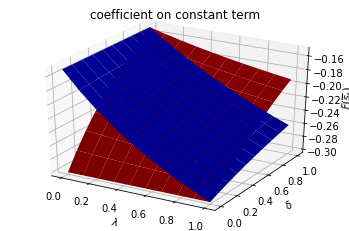

In [22]:
run(construct_arrays1, {"f1_vals":[0.5, 1.]}, state_vec1)

Set $f_{1,{s_t}}$ and $d_{s_t}$ as constant functions and

$$
f_{2,1} = 0.5, f_{2,2} = 1
$$

symmetric Π case:



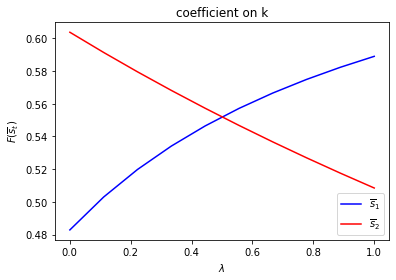

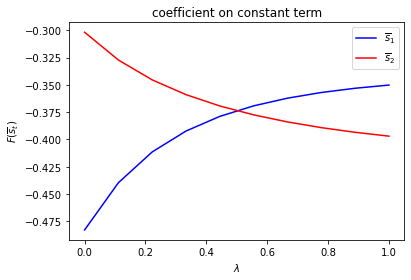

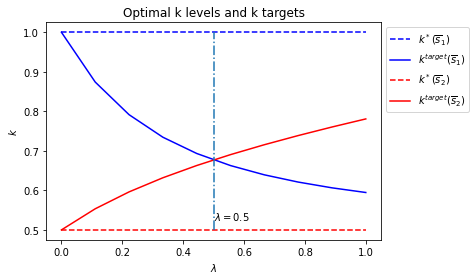

asymmetric Π case:



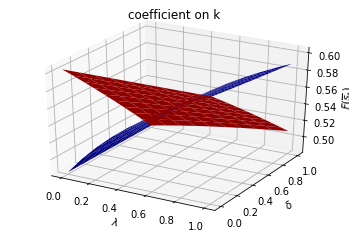

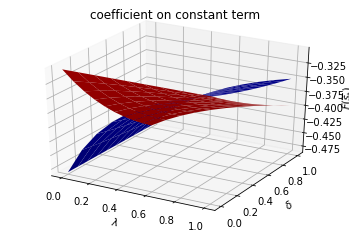

In [23]:
run(construct_arrays1, {"f2_vals":[0.5, 1.]}, state_vec1)

## Example 2

We now add to the example 1 setup another state variable $w_t$
that follows the evolution law

$$
w_{t+1}=\alpha_{0}\left(s_{t}\right)+\rho\left(s_{t}\right)w_{t}+\sigma\left(s_{t}\right)\epsilon_{t+1},\quad\epsilon_{t+1}\sim N\left(0,1\right)
$$

We think of $w_t$ as a rental rate or tax rate that the decision
maker pays each period for $k_t$.

To capture this idea, we add to the decision-maker’s one-period payoff
function the product of $w_t$ and $k_t$

$$
r(s_{t},k_{t},w_{t})=f_{1,s_{t}} k_{t}-f_{2, s_{t}} k_{t}^{2}-d_{s_{t}} (k_{t+1}-k_{t})^{2}-w_{t}k_{t},
$$

We now let the continuous part of the state at time $t$ be
$x_{t}=\begin{bmatrix} k_{t}\\ 1\\ w_{t} \end{bmatrix}$
and continue to set the control $u_{t}=k_{t+1}-k_{t}$.

We can write the one-period payoff function
$r\left(s_{t},k_{t},w_{t}\right)$ and the state-transition law as

$$
\begin{aligned}
r\left(s_{t},k_{t},w_{t}\right)
  & =f_{1}\left(s_{t}\right)k_{t}-f_{2}\left(s_{t}\right)k_{t}^{2}-d\left(s_{t}\right)\left(k_{t+1}-k_{t}\right)^{2}-w_{t}k_{t} \\
  & =-\left(x_{t}^{\prime}\underset{\equiv R\left(s_{t}\right)}{\underbrace{
   \begin{bmatrix}
      f_{2}\left(s_{t}\right) & -\frac{f_{1}\left(s_{t}\right)}{2} & \frac{1}{2}\\
      -\frac{f_{1}\left(s_{t}\right)}{2} & 0 & 0\\
      \frac{1}{2} & 0 & 0
   \end{bmatrix}}}
x_{t}+
\underset{\equiv Q\left(s_{t}\right)}{\underbrace{d\left(s_{t}\right)}}u_{t}^{2}\right),
\end{aligned}
$$

and

$$
x_{t+1}=\begin{bmatrix}
k_{t+1}\\
1\\
w_{t+1}
\end{bmatrix}=\underset{\equiv A\left(s_{t}\right)}{\underbrace{\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & \alpha_{0}\left(s_{t}\right) & \rho\left(s_{t}\right)
\end{bmatrix}}}x_{t}+\underset{\equiv B\left(s_{t}\right)}{\underbrace{\begin{bmatrix}
1\\
0\\
0
\end{bmatrix}}}u_{t}+\underset{\equiv C\left(s_{t}\right)}{\underbrace{\begin{bmatrix}
0\\
0\\
\sigma\left(s_{t}\right)
\end{bmatrix}}}\epsilon_{t+1}
$$

In [24]:
def construct_arrays2(f1_vals=[1. ,1.],
                      f2_vals=[1., 1.],
                      d_vals=[1., 1.],
                      α0_vals=[1., 1.],
                      ρ_vals=[0.9, 0.9],
                      σ_vals=[1., 1.]):
    """
    Construct matrices that maps the problem described in example 2
    into a Markov jump linear quadratic dynamic programming problem.
    """

    m = len(f1_vals)
    n, k, j = 3, 1, 1

    Rs = np.zeros((m, n, n))
    Qs = np.zeros((m, k, k))
    As = np.zeros((m, n, n))
    Bs = np.zeros((m, n, k))
    Cs = np.zeros((m, n, j))

    for i in range(m):
        Rs[i, 0, 0] = f2_vals[i]
        Rs[i, 1, 0] = - f1_vals[i] / 2
        Rs[i, 0, 1] = - f1_vals[i] / 2
        Rs[i, 0, 2] = 1/2
        Rs[i, 2, 0] = 1/2

        Qs[i, 0, 0] = d_vals[i]

        As[i, 0, 0] = 1
        As[i, 1, 1] = 1
        As[i, 2, 1] = α0_vals[i]
        As[i, 2, 2] = ρ_vals[i]

        Bs[i, :, :] = np.array([[1, 0, 0]]).T

        Cs[i, :, :] = np.array([[0, 0, σ_vals[i]]]).T

    Ns = None
    k_star = None

    return Qs, Rs, Ns, As, Bs, Cs, k_star

In [25]:
state_vec2 = ["k", "constant term", "w"]

Only $d_{s_t}$ depends on $s_t$.

symmetric Π case:



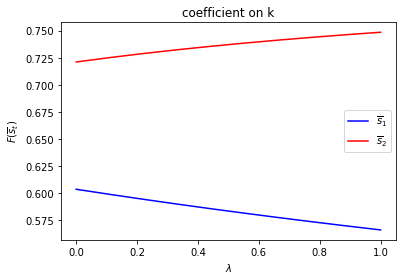

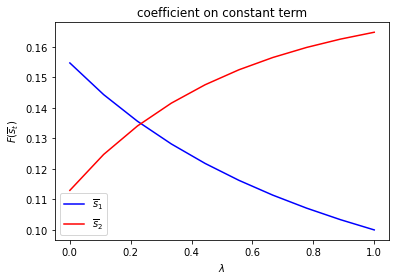

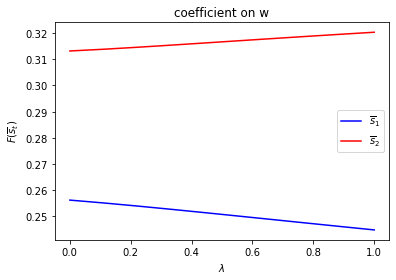

asymmetric Π case:



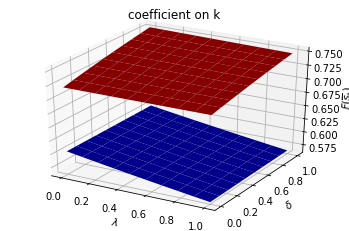

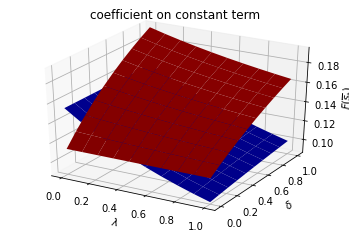

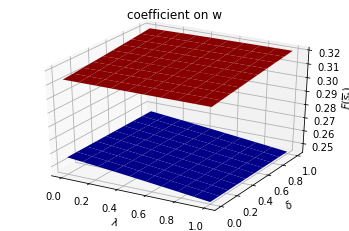

In [26]:
run(construct_arrays2, {"d_vals":[1., 0.5]}, state_vec2)

Only $f_{1,{s_t}}$ depends on $s_t$.

symmetric Π case:



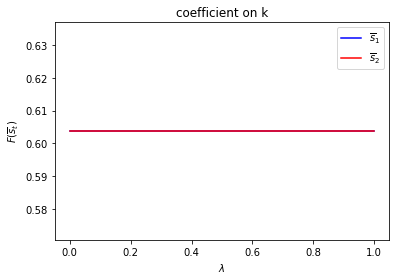

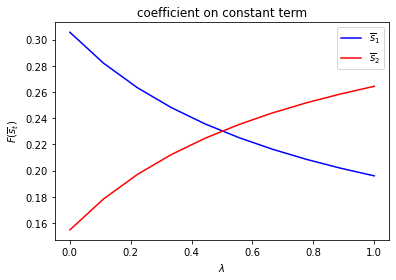

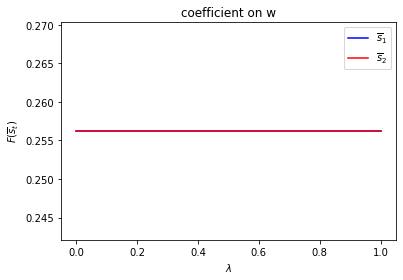

asymmetric Π case:



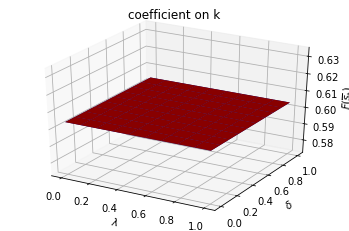

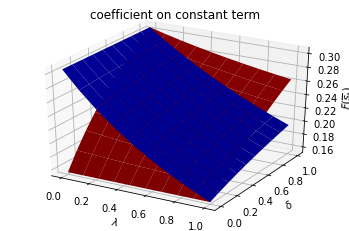

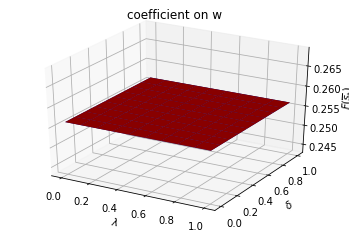

In [27]:
run(construct_arrays2, {"f1_vals":[0.5, 1.]}, state_vec2)

Only $f_{2,{s_t}}$ depends on $s_t$.

symmetric Π case:



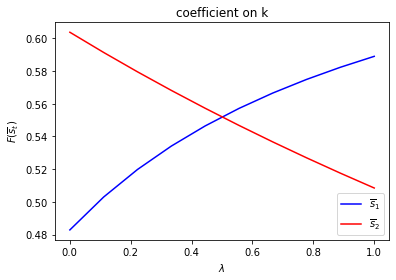

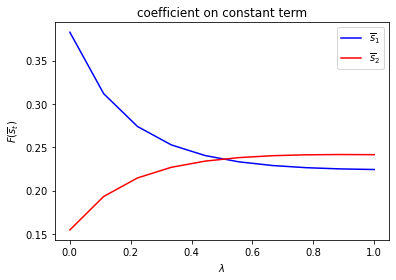

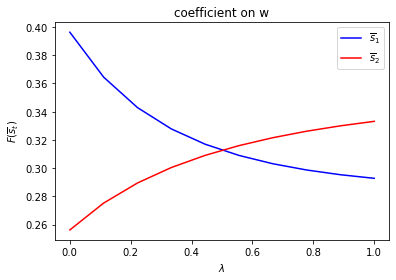

asymmetric Π case:



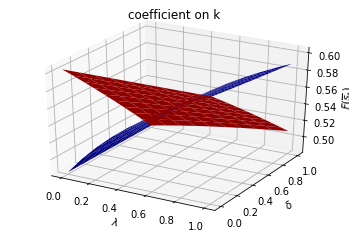

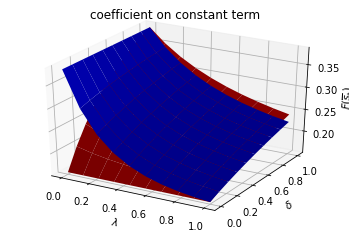

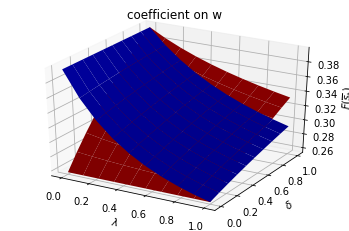

In [28]:
run(construct_arrays2, {"f2_vals":[0.5, 1.]}, state_vec2)

Only $\alpha_0(s_t)$ depends on $s_t$.

symmetric Π case:



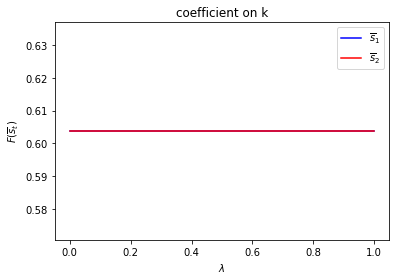

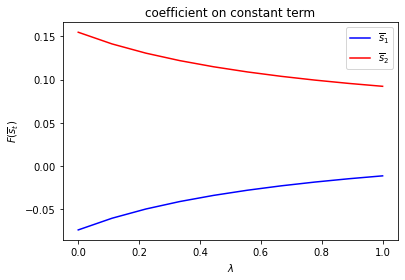

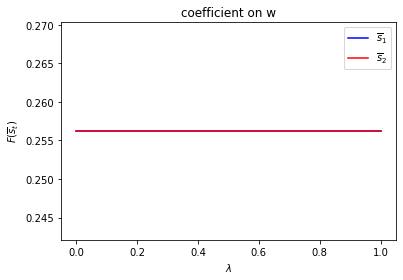

asymmetric Π case:



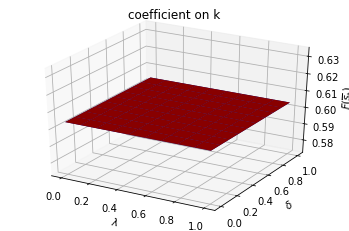

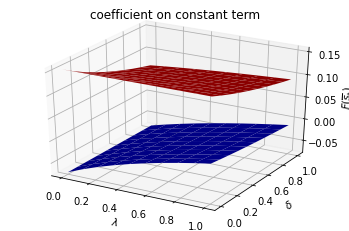

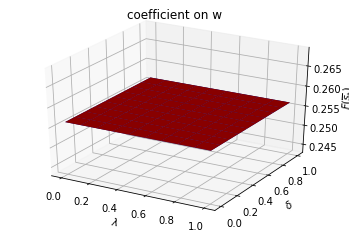

In [29]:
run(construct_arrays2, {"α0_vals":[0.5, 1.]}, state_vec2)

Only $\rho_{s_t}$ depends on $s_t$.

symmetric Π case:



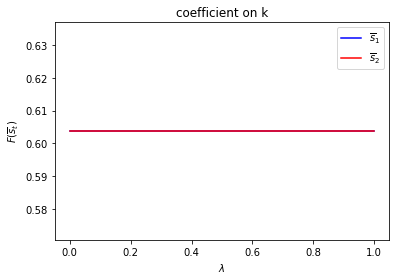

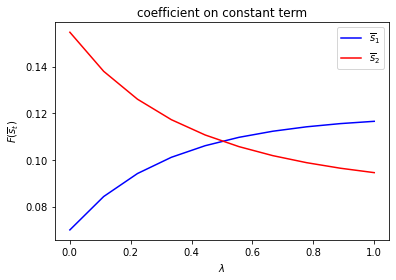

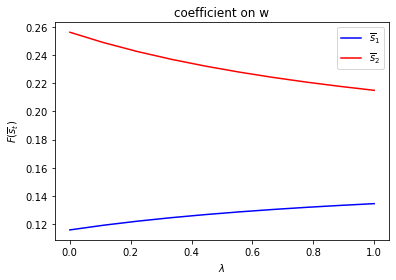

asymmetric Π case:



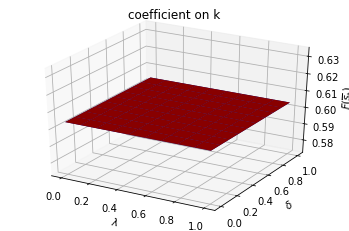

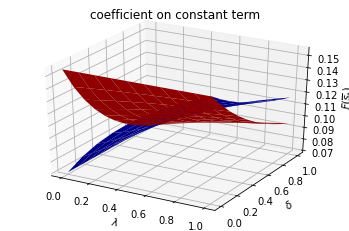

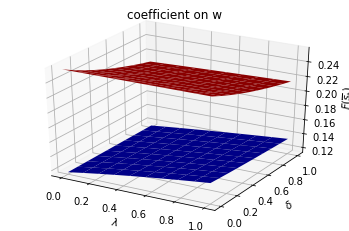

In [30]:
run(construct_arrays2, {"ρ_vals":[0.5, 0.9]}, state_vec2)

Only $\sigma_{s_t}$ depends on $s_t$.

symmetric Π case:



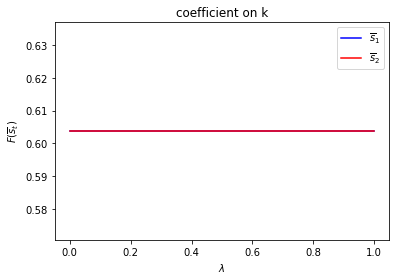

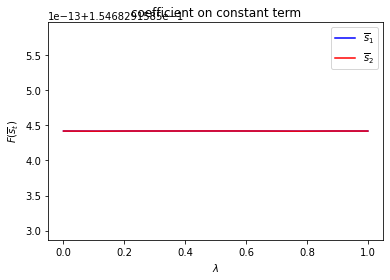

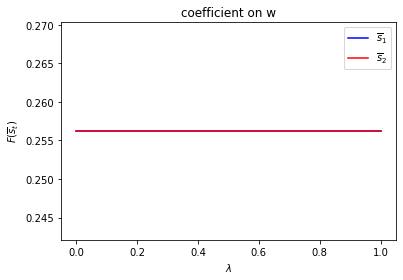

asymmetric Π case:



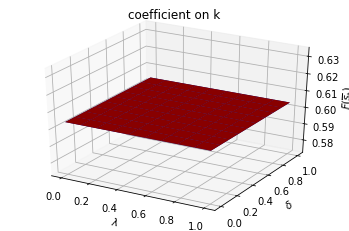

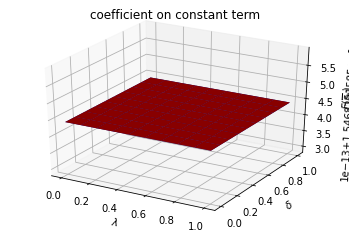

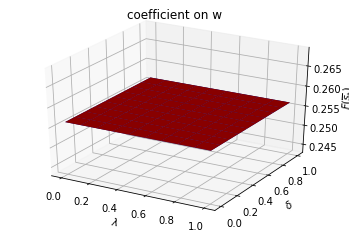

In [31]:
run(construct_arrays2, {"σ_vals":[0.5, 1.]}, state_vec2)

## More examples

The following lectures describe how Markov jump linear quadratic dynamic programming can be used to extend the {cite}`Barro1979` model
of optimal tax-smoothing and government debt in several interesting directions

1. {doc}`How to Pay for a War: Part 1 <tax_smoothing_1>`
2. [How to Pay for a War: Part 2](https://python-advanced.quantecon.org/tax_smoothing_2.html)
3. [How to Pay for a War: Part 3](https://python-advanced.quantecon.org/tax_smoothing_3.html)